# Problem 8

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

%matplotlib inline

## Reading and preprocessing the data
We first read the data using pandas `read_csv` method and then use the `LabelEncoder` class from the `sklearn` package to encode the string data in the dataset into integers to be able to easily work with it.

In [54]:
import string
from sklearn import preprocessing

prep = preprocessing.LabelEncoder()
prep.fit([c for c in string.ascii_lowercase])


def read_and_encode(dataset_path):
    df = pd.read_csv(dataset_path)
    raw_x = df.values[:, 1:]
    y = df.values[:, 0]
    x = []
    for i in range(len(raw_x)):
        x.append(prep.transform(raw_x[i]))
    return np.array(x), y.astype('int')


X, y = read_and_encode('../Questions/Q8_Data/noisy_train.csv')
XValid, yValid = read_and_encode('../Questions/Q8_Data/noisy_valid.csv')
XTest, yTest = read_and_encode('../Questions/Q8_Data/noisy_test.csv')

columns = pd.read_csv('../Questions/Q8_Data/noisy_train.csv').columns[1:]

## Training the decision tree
We use the `DecisionTreeClassifier` class from the `sklearn` package to train a DT on our data with entropy as our criterion for splits. We also use the `export_graphviz` method to export the trained tree into a graphviz program in order to be able to visualize the tree (the result is available in the Q8_tree file). Then we measure the eculidian error of the trained model on the train, validation and test datasets.


In [55]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC

model = DTC(criterion='entropy')
model.fit(X, y)

graph_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['P', 'NP'], 
                                  filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(graph_data)
graph.render('Q8_tree')

p_train = model.predict(X)
print('Error for train data: %f' % np.linalg.norm(y - p_train))

p_valid = model.predict(XValid)
print('Error for valid data : %f' % np.linalg.norm(yValid - p_valid))

p_test = model.predict(XTest)
print('Error for test data: %f' % np.linalg.norm(yTest - p_test))


Error for train data: 0.000000
Error for valid data : 18.601075
Error for test data: 18.138357


## Pruning the tree
For post-pruning the estimated tree, we use the `max_depth` argument of the `DecisionTreeClassifier` class to be able to limit our final result and post-prune it.
We use different max depths (1, 2, ..., 39) for training the tree and then measure the error using the eculidian norm. We then measure the eculidian error on the train, validation and test datasets. 
As shown in the plot, we have overfit at node counts approximately above 200 and underfit at node counts approximately lower than 50, we can find almost the best model with these options with about 110 nodes.

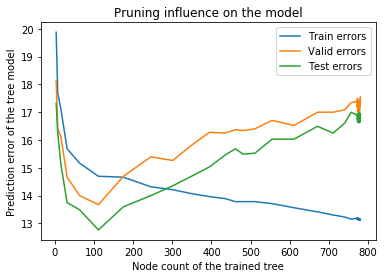

In [56]:
nodes = []
train_errors = []
valid_errors = []
test_errors = []

for i in range(1, 40):

    model = DTC(criterion='entropy', min_samples_split=5, max_depth=i)
    model.fit(X, y)

    p_train = model.predict(X)
    train_error = np.linalg.norm(y - p_train)
    p_valid = model.predict(XValid)
    valid_error = np.linalg.norm(yValid - p_valid)
    p_test = model.predict(XTest)
    test_error = np.linalg.norm(yTest - p_test)

    nodes.append(model.tree_.node_count)
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)

plot.plot(nodes, train_errors, label='Train errors')
plot.plot(nodes, valid_errors, label='Valid errors')
plot.plot(nodes, test_errors, label='Test errors')
plot.xlabel('Node count of the trained tree')
plot.ylabel('Prediction error of the tree model')
plot.title('Pruning influence on the model')
plot.legend()
plot.show()
